# Chapter 3
## Data Manipulation

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set()

# The line below one is only needed for this workshop
from done import imdone, quizanswer

In [2]:
# Make figures bigger in presentation
from matplotlib import rcParams
rcParams['figure.dpi'] = 144

We already saw a small example at the end of chapter 1 when we talked about data sanitazion. We filtered the data in such a way that we only saw the names that were only one letter long.

Here we will again focus on the baby names data set. So load the CSV again as we did before.
### Exercise 3.1
Load `data/ontariobabynames.csv` and store the result in the object `babynames`.

In [3]:
# Solution (HIDEME)
babynames = pd.read_csv('data/ontariobabynames.csv')

In [ ]:
imdone(3,1)

If we try to plot the number of babynames as a function of time, it will not be very illuminating. Also, this takes a some time considering that we have almost one million rows in our data set depending on how busy Syzygy is, so don't try to run the next line.

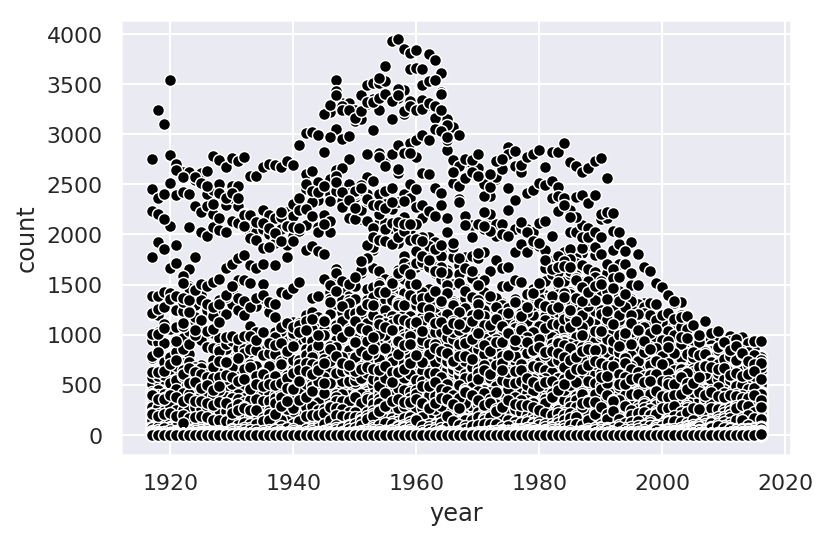

In [4]:
sns.scatterplot("year", "count", color="black", data=babynames)

Instead we would like to pick out one name and use that. How to do that?

Luckily pandas is build for this sort of thing. We can tell pandas to only select certain rows based on criteria we provide. The syntax is
```
dataframe[some condition]
```
where `some condition` is something we would like to select on. You can see this is similar to selecting rows or columns as we saw before.

The conditions are in the form of
```
dataframe["column name"] == "something"
```
We can even combine conditions using the operators `&` for AND and `|` for OR.

So let's try that out. We can look at the popularity of the female name Mary.

In [4]:
femalemarys = babynames[(babynames["name"] == "Mary") & (babynames["sex"] == "F")]

Now plotting can be one by calling the plot function and, as before, specifying which columns needs to be plotted. Here we plot the number of female babies named Mary as a function of time.

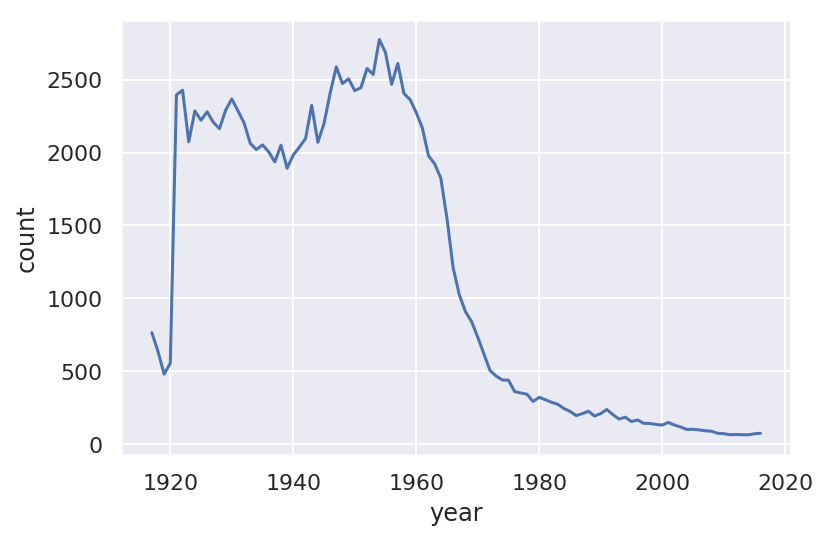

In [9]:
sns.lineplot("year", "count", data=femalemarys)

This can also be combined in a single statement, although it doesn't exactly help readability.

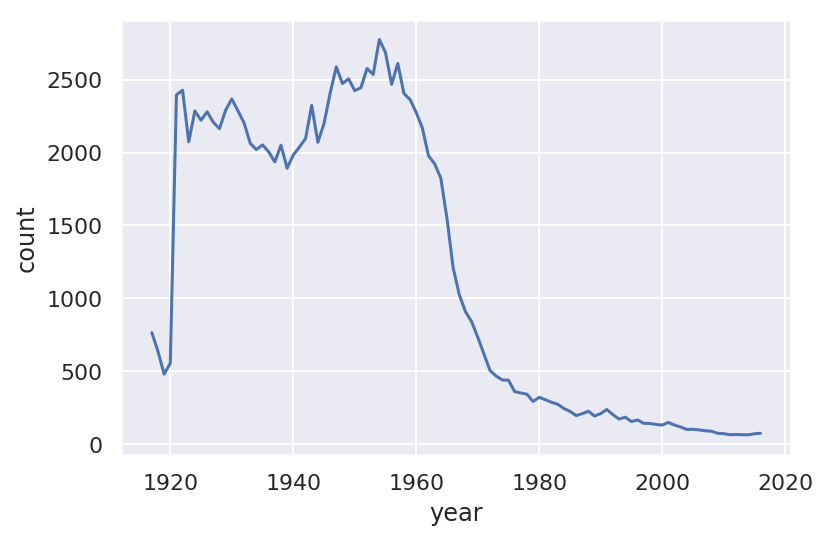

In [10]:
sns.lineplot("year", "count", data=babynames[(babynames["name"] == "Mary") & (babynames["sex"] == "F")])

### Exercise 3.2
Plot your own name as a function of time. Fill in the `...` below. If your name is not in the data, you'll be happy to know that you are very unique. However, you'll also get a spectacular error. For the purpose of this exercise, just use any other name.  Run the cell with `imdone(3,2)` when you are done.

In [ ]:
yourname = ...
sns.lineplot(..., data=yourname)

In [ ]:
imdone(3,2)

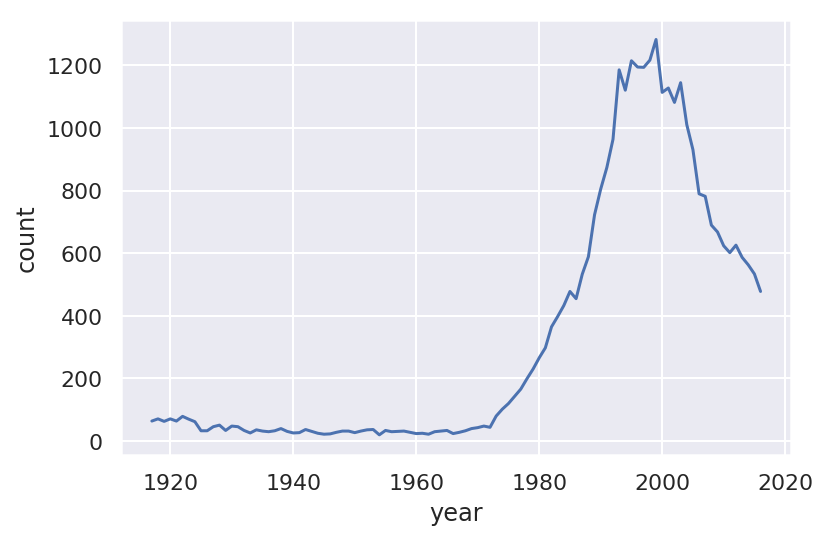

In [5]:
# Solution (HIDEME)
yourname = babynames[(babynames["name"] == "Emily") & (babynames["sex"] == "F")]
sns.lineplot("year", "count", data=yourname)

Let's get the female babies name Marie too.

In [6]:
femalemaries = babynames[(babynames["name"] == "Marie") & (babynames["sex"] == "F")]

Trying to plot both means that Seaborn will make it into one plot for you as we saw in the previous chapter.

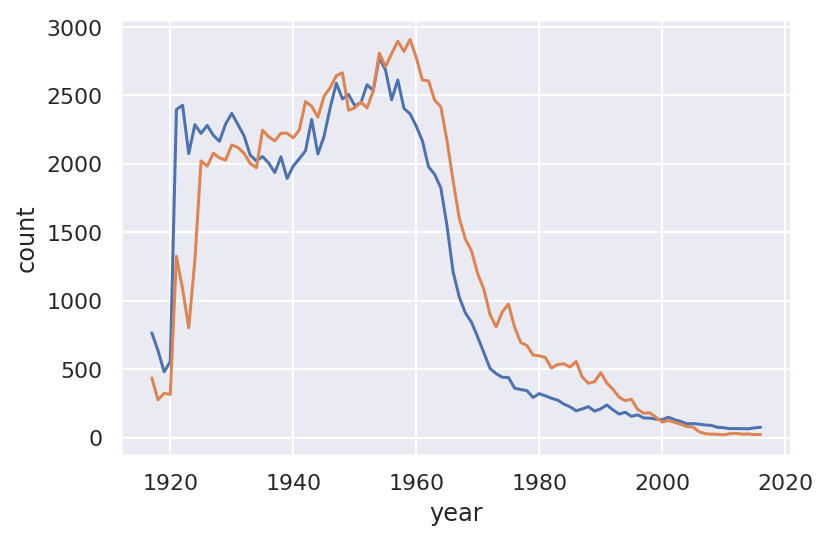

In [8]:
sns.lineplot("year", "count", data=femalemarys)
sns.lineplot("year", "count", data=femalemaries)

But again, FacetGrid plots, like those produced by `relplot` work slightly different. For those, you need to modify the data to be in the proper format. We will get to that later.

## Selecting Data

Remember from chapter 1, we can select data by column by using the column name, by index using the data frame index number (usually the same as the array index, but not always!), or with `iloc` using the raw array indices. 

`iloc` is faster since there is comparison of labels. Most of the times, you won't notice a difference, but if you are doing many operations, you may want to use this.

In [15]:
# Gets the 123457th element of the third column. Remember that array indices start at zero
babynames.iloc[123456,2]

'Elin'

## Logical tests
When we selected all of the female babies named Mary and Marie we used logical tests. These are statements that are either `True` or `False`. There are various comparisons possible

| Notation | `True` if                           |
| -------  | ----------------------------------- |
| `x < y`  | `x` is less than `y`                |
| `x > y`  | `x` is greater than `y`             |
| `x == y` | `x` is equal to `y`                 |
| `x <= y` | `x` is less than or equal to `y`    |
| `x >= y` | `x` is greater than or equal to `y` |
| `x != y` | `x` is not equal to `y`             |
| `x.isin(["a","b"])` | `x` is either "a" or "b" |

In [16]:
x = 1

In [17]:
x > 2

False

### Quiz 3.1
From chapter 1 we saw various possibilities for values, like `1` and `"one"`.

There is another value called `nan` (denoted as `np.nan` since it is part of Numpy).

What might `nan` stand for?

<div style="margin-bottom: 20em;" />

### Quiz 3.2
What is the result?

```
1 == 1
```

<div style="margin-bottom: 20em;" />

### Quiz 3.2
What is the result?

```
1 == np.nan
```

<div style="margin-bottom: 20em;" />

### Quiz 3.4
What is the result?

```
np.nan == np.nan
```

<div style="margin-bottom: 20em;" />

## Logical tests, now with isna

| Notation | `True` if                           |
| -------  | ----------------------------------- |
| `x < y`  | `x` is less than `y`                |
| `x > y`  | `x` is greater than `y`             |
| `x == y` | `x` is equal to `y`                 |
| `x <= y` | `x` is less than or equal to `y`    |
| `x >= y` | `x` is greater than or equal to `y` |
| `x != y` | `x` is not equal to `y`             |
| `x["column"].isin(["a","b"])` | `x` is either "a" or "b" |
| `pd.isna(x)` | `x` is a missing value          |
| `!pd.isna(x)` | `x` is not a missing value          |

### Exercise 3.3
Using the logical tests and the selection method, find:
- All of the rows where prop is greater than or equal to 0.06
- All of the children names "Alberta"

In [ ]:
imdone(3,3)

In [ ]:
# Solution (HIDEME)
babynames[babynames["prop"] >= 0.06]

In [ ]:
# Solution (HIDEME)
babynames[babynames["name"] == "Alberta"]

## Common mistakes
Beware, `==` and `=` mean different things! `==` is the comparison operator, `=` is the assignment operator.

Also, remember the quotes. `"hello"` is a string value, `hello` is an object.
## Boolean operators
Logical statements can be combined to make more complex version.

| Operator in dataframes | Operator for variables | Meaning |
| -------- | ------- | ------- |
| `&`      | `and`   | and     |
| `\|`     | `or`    | or      |
| `!`      | `not`   | not     |
| `(  )`   | group tests | group tests |

```
x = 2

(x >= 2) & (x < 3)
True & True
True
```

### Exercise 3.4
- Find the boys named Mary
- Find the names that were used by exactly 5 or 6 children in 1920
- Find the names that are either John, Jon, Johnny or Johnnie

In [ ]:
imdone(3,4)

In [ ]:
# Solution (HIDEME)
babynames[(babynames["name"] == "Mary") & (babynames["sex"] == "M")]

In [ ]:
# Solution (HIDEME)
babynames[((babynames["count"] == 5) | (babynames["count"] == 6)) & (babynames["year"] == 1920)]

In [ ]:
# Solution (HIDEME)
babynames[babynames["name"].isin(["John", "Jon", "Johnny", "Johnnie"])]

## More common mistakes
### Combining test into one
Wrong: `10 < df["n"] < 20`<br />
Right: `(10 < df["n"]) & df["n"] < 20`

### Making too many tests
"Wrong": `df[(df["colname"] == "a") & (df["colname"] == "b") & (df["colname"] == "c")]`<br />
Right: `df[df["colname"].isin(["a", "b", "c"])]`

## Sorting
Pandas allows you to sort data based on columns using the function `sort_values`. So for our `babynames` DataFrame, we can use `babynames.sort_values`. Let's look at the help to see what the options are.

In [ ]:
help(babynames.sort_values)

### Exercise 3.5
Use `sort_values` to find the largest value of "count".

Combine your knowledge of `sort_values` and the selection rules in this chapter to find the smallest value of "count" that is not zero.

In [ ]:
imdone(3,5)

In [11]:
# Solution (HIDEME)
babynames.sort_values("count", ascending=False).head(10)

,year,sex,name,count,prop
478740,1957,M,Joseph,3946,0.065579
478739,1956,M,Joseph,3935,0.065396
478741,1958,M,Joseph,3853,0.064033
478743,1960,M,Joseph,3840,0.063817
478742,1959,M,Joseph,3811,0.063335
466745,1962,M,David,3805,0.063235
466746,1963,M,David,3740,0.062155
478738,1955,M,Joseph,3681,0.061175
466743,1960,M,David,3664,0.060892
466742,1959,M,David,3651,0.060676


In [12]:
# Solution (HIDEME)
babynames[babynames["count"] > 0].sort_values("count").head()

,year,sex,name,count,prop
576341,1958,M,Bela,5,0.000083
741084,2001,M,Uzair,5,0.000083
741083,2000,M,Uzair,5,0.000083
462146,1963,M,Ben,5,0.000083
740984,2001,M,Usama,5,0.000083


We can combine all of these actions by storing the intermediate result. For example, if we want the name and number of the boy babies from 2015 sorted by number, we can do that!

In [23]:
boys_2015 = babynames[(babynames["year"] == 2015) & (babynames["sex"] == "M")]
boys_2015 = boys_2015[["name", "count"]]
boys_2015 = boys_2015.sort_values(by="count", ascending=False)
boys_2015.head(10)

,name,count
589498,Liam,793
462398,Benjamin,748
515998,Noah,735
595698,Lucas,707
607598,Ethan,703
497198,William,655
635698,Logan,638
485398,Nathan,634
483098,Mason,630
477998,Jacob,618


You can also stick is all together, but it doesn't look very pretty...

In [24]:
babynames[(babynames["year"] == 2015) & (babynames["sex"] == "M")][["name", "count"]].sort_values(by="count", ascending=False).head(10)

,name,count
589498,Liam,793
462398,Benjamin,748
515998,Noah,735
595698,Lucas,707
607598,Ethan,703
497198,William,655
635698,Logan,638
485398,Nathan,634
483098,Mason,630
477998,Jacob,618


### Excercise 3.6
Find the female babies born in 2007, keep only the name and count column and find the most popular names

In [ ]:
imdone(3,6)

In [26]:
girls_2017 = babynames[(babynames["year"] == 2007) & (babynames["sex"] == "F")]
girls_2017 = girls_2017[["name", "count"]]
girls_2017 = girls_2017.sort_values(by="count", ascending=False)
girls_2017.head(10)

,name,count
130290,Emma,907
326990,Olivia,883
48090,Ava,845
130090,Emily,782
171790,Isabella,630
369090,Sarah,620
3590,Abigail,591
158790,Hannah,575
394990,Sophia,547
268890,Madison,533


### Exercise 3.7 - mini-exam!

1. Trim babynames to just the rows that contain your name and your sex
2. Trim the result to just the columns that will appear in your graph (not strictly necessary, but useful practice)
3. Plot the results as a line graph with year on the x axis and prop on the y axis

In [ ]:
imdone(3,7)

## Grouping

**TODO**: Fill in grouping stuff.

In [29]:
popnames=babynames.groupby(by="name").sum().sort_values(by="count", ascending=False)
popnames

,year,count,prop
name,,,
Joseph,393300,184347,3.063667
John,393300,179775,2.987685
Robert,393300,165659,2.753091
Michael,393300,145378,2.416041
David,393300,144194,2.396364
William,393300,143489,2.384647
James,393300,136207,2.263628
Marie,393300,127498,2.118893
Mary,393300,117845,1.958469


## Saving Data
To save our modified data, we can use another pandas function similar to `read_csv`. Rather unsurprisingly, this function is called `write_csv`.